# Regression Machine Learning Case Study Project
## 1.Problem Definition
For this project we will investigate the Boston House Price dataset. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows (taken from the UCI Machine Learning Repository):
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 millions)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

---

Trong dự án này, chúng ta sẽ nghiên cứu bộ dữ liệu Giá nhà Boston. Mỗi bản ghi trong cơ sở dữ liệu mô tả một vùng ngoại ô hoặc thị trấn của Boston. Dữ liệu được lấy từ Khu vực Thống kê Đô thị Chuẩn Boston (SMSA) năm 1970. Các thuộc tính được định nghĩa như sau (trích từ Kho lưu trữ Học máy UCI):
1. CRIM: tỷ lệ tội phạm bình quân đầu người theo thị trấn
2. ZN: tỷ lệ đất ở được phân vùng cho các lô đất trên 25.000 feet vuông (khoảng 2.400 mét vuông).
3. INDUS: tỷ lệ mẫu Anh đất kinh doanh phi bán lẻ trên mỗi thị trấn
4. CHAS: Biến giả sông Charles (= 1 nếu ranh giới khu vực là sông; 0 nếu không)
5. NOX: nồng độ oxit nitric (phần trên 10 triệu)
6. RM: số phòng trung bình trên mỗi căn hộ
7. AGE: tỷ lệ nhà ở do chủ sở hữu xây dựng trước năm 1940
8. DIS: khoảng cách có trọng số đến năm trung tâm việc làm ở Boston
9. RAD: chỉ số khả năng tiếp cận đường cao tốc xuyên tâm
10. TAX: thuế suất tài sản toàn phần trên 10.000 đô la
11. PTRATIO: tỷ lệ học sinh/giáo viên theo thị trấn
12. B: 1000 (Bk - 0,63)2 trong đó Bk là tỷ lệ người da đen theo thị trấn
13. LSTAT: % địa vị thấp hơn của dân số
14. MEDV: Giá trị trung bình của nhà ở do chủ sở hữu xây dựng theo đơn vị nghìn đô la
Chúng ta có thể thấy rằng đầu vào các thuộc tính có sự kết hợp của các đơn vị.

## 2. Load the Dataset
### **Import libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix as sm

from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold as KF
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Ensemble
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)

# Pipeline & metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### **Load data**

In [6]:
# Load dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
         'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./data/housing.csv', names=names)

## 3. Analyze data (Phân tích dữ liệu)
### **Descriptive Statistics**

In [7]:
#shape
print(df.shape)

(506, 14)


In [8]:
# type
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [10]:
# head
print(df.head(20))

       CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [15]:
#description
# Dataset description
pd.set_option('display.precision', 1)
print(df.describe())

          CRIM     ZN  INDUS     CHAS  ...  PTRATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  ...    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02  ...     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01  ...      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00  ...     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00  ...     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00  ...     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00  ...     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00  ...     22.0  396.9   38.0   50.0

[8 rows x 14 columns]


### *Note*
Mặc định (`include=None`): chỉ áp dụng cho cột dạng số (`int`, `float`)

| Thông số | Ý nghĩa | Ảnh hưởng |
|----------|---------|-----------|
| **count** | Số lượng giá trị hợp lệ (không tính NaN). | Ít giá trị --> thống kê kém tin cậy. |
| **mean**  | Giá trị trung bình của cột. | Dễ bị kéo lệch bởi outlier. |
| **std**   | Độ lệch chuẩn (mức độ phân tán so với mean). | Nhỏ --> dữ liệu đồng đều; Lớn --> dữ liệu phân tán mạnh. |
| **min**   | Giá trị nhỏ nhất. | Thấp bất thường có thể là outlier hoặc lỗi nhập liệu. |
| **25% (Q1)** | Phân vị 25% (25% dữ liệu nhỏ hơn hoặc bằng). | Cho thấy ngưỡng dưới của dữ liệu. |
| **50% (median, Q2)** | Giá trị trung vị. | Ổn định hơn mean, ít bị ảnh hưởng bởi outlier. |
| **75% (Q3)** | Phân vị 75% (75% dữ liệu nhỏ hơn hoặc bằng). | Cho thấy ngưỡng trên của dữ liệu. |
| **max**   | Giá trị lớn nhất. | Cao bất thường có thể là outlier. |

---

Dạng chuỗi (`include=[object]`): chỉ áp dụng cho cột dạng chuỗi

| Thông số | Ý nghĩa | Ảnh hưởng |
|----------|---------|-----------|
| **count**  | Số giá trị hợp lệ (không tính NaN). | Ít giá trị --> kết quả thống kê không tin cậy. |
| **unique** | Số lượng giá trị khác nhau (distinct). | Cho biết độ đa dạng của dữ liệu. |
| **top**    | Giá trị xuất hiện nhiều nhất (mode). | Phản ánh xu hướng phổ biến. |
| **freq**   | Tần suất xuất hiện của giá trị phổ biến nhất. | Giá trị cao --> dữ liệu mất cân bằng. |


### *Correlation matrix (Ma trận phân tán)*


Now, let’s now take a look at the correlation between all of the numeric attributes.

---
Bây giờ, chúng ta hãy xem xét mối tương quan giữa tất cả các thuộc tính số.

In [23]:
# correlation
pd.set_option('display.precision', 2)
# Tính ma trận tương quan
corr = df.corr(method="pearson")
print(corr)

         CRIM    ZN  INDUS      CHAS   NOX  ...   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42  ...  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  ... -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76  ...  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  ... -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00  ...  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  ... -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73  ...  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  ... -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61  ...  0.91     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  0.67  ...  1.00     0.46 -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19  ...  0.46     1.00 -0.18   0.37 -0.51
B       -0.39  0

## 4. Data Visualization (Trực quan hóa dữ liệu)
### **Unimodal Data Visualizations (Hình ảnh hóa dữ liệu)**

**Histograms (Biểu đồ cột tần suất)**

Let’s look at visualizations of individual attributes. It is often useful to look at your data using multiple different visualizations in order to spark ideas. Let’s look at histograms of each attribute to get a sense of the data distributions.

---
Hãy cùng xem xét hình ảnh trực quan của từng thuộc tính. Việc xem xét dữ liệu của bạn bằng nhiều hình ảnh trực quan khác nhau thường rất hữu ích để khơi gợi ý tưởng. Hãy cùng xem biểu đồ tần suất của từng thuộc tính để hiểu rõ hơn về phân phối dữ liệu.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

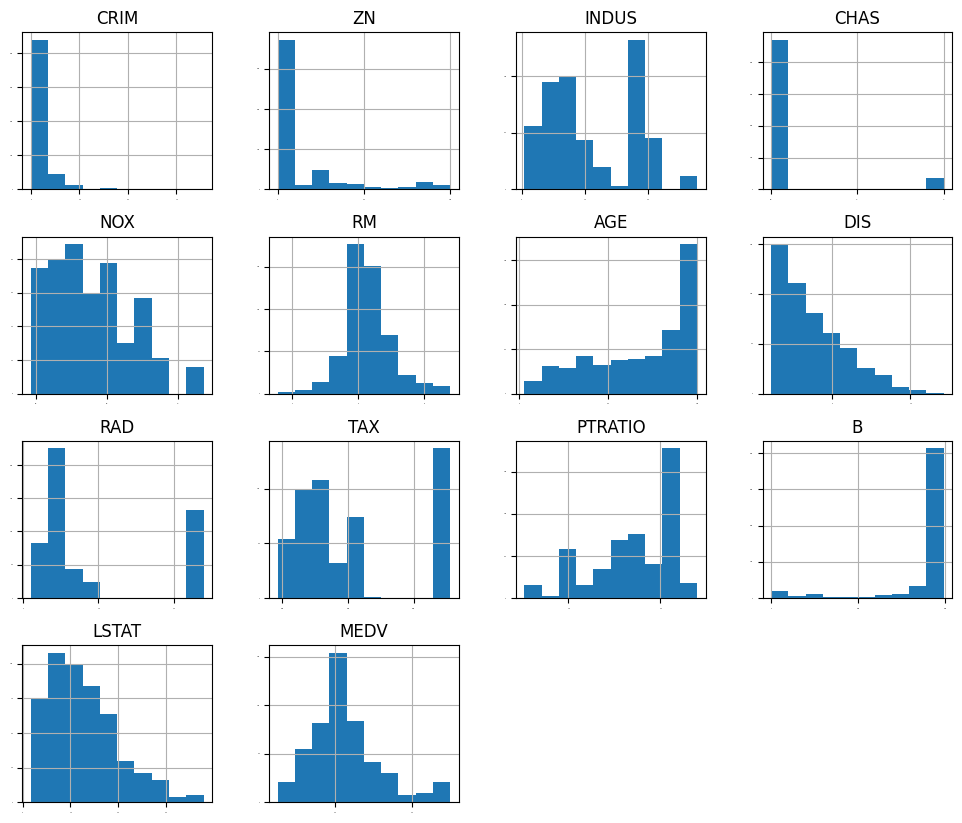

In [26]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 10))

**Density Plot (Biểu đồ mật độ)**

Let’s look at the same distributions using density plots that smooth them out a bit.

---
Chúng ta hãy xem xét các phân phối tương tự bằng cách sử dụng biểu đồ mật độ để làm mịn chúng hơn một chút.

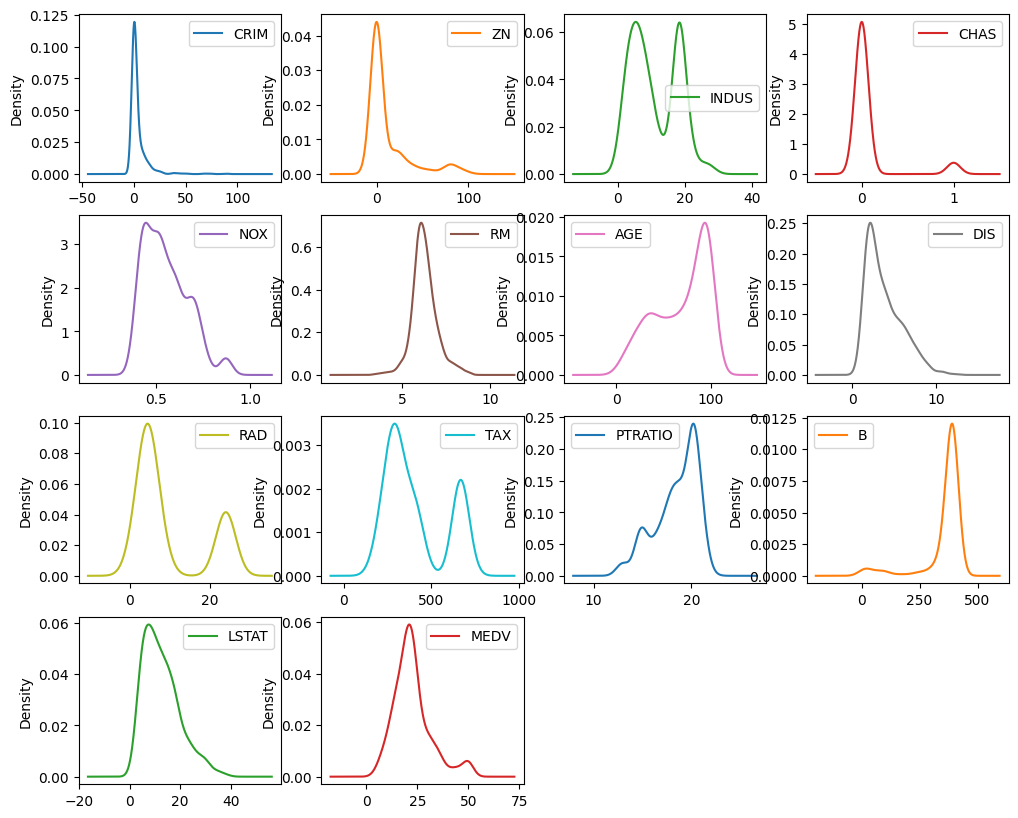

In [27]:
# density
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()

Based on the above results, this perhaps adds more evidence suspicion about possible exponential and bimodal distributions. It also looks like NOX, RM and LSTAT may be skewed Gaussian distributions, which might be helpful later with transforms.

---
Dựa vào kết quả trên, điều này có lẽ củng cố thêm bằng chứng cho nghi ngờ về khả năng phân phối mũ và phân phối hai đỉnh. Có vẻ như NOX, RM và LSTAT có thể là phân phối chuẩn Gauss, điều này có thể hữu ích sau này với các phép biến đổi.

**box and whisker plots (Biểu đồ hộp)**

This helps point out the skew in many distributions so much so that data looks like outliers

---
Điều này giúp chỉ ra độ lệch trong nhiều phân phối đến mức dữ liệu trông giống như các giá trị ngoại lệ

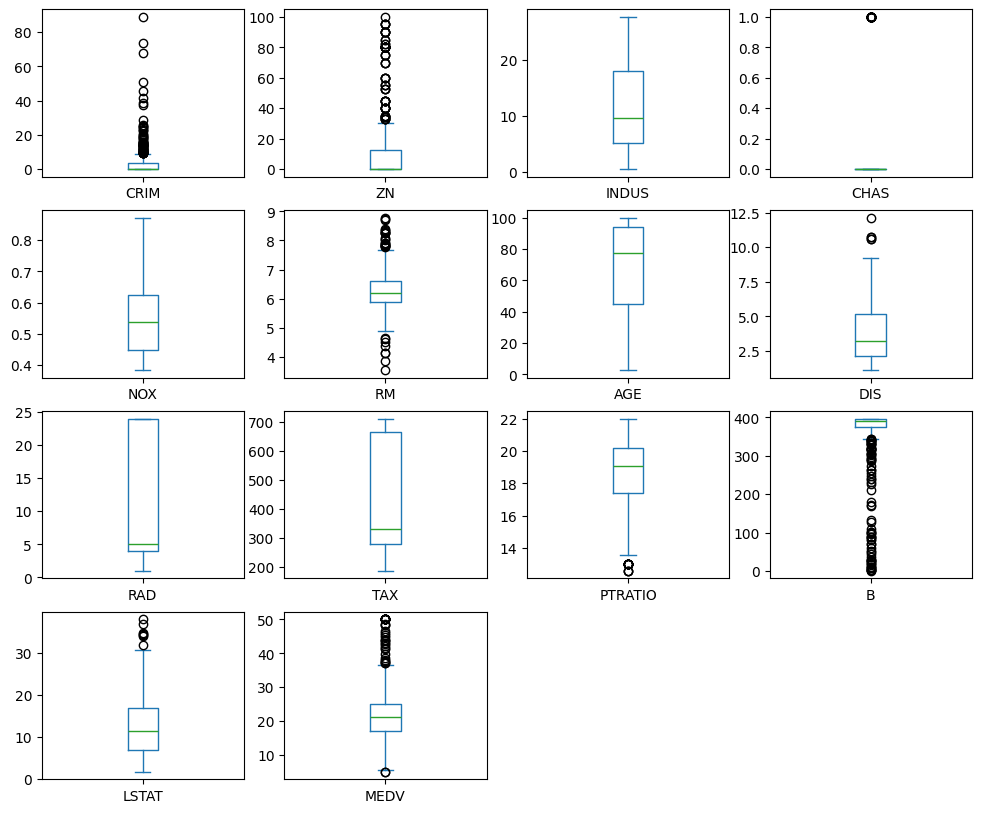

In [28]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(12, 10))
plt.show()

### **Multimodal Data Visualization (Hình ảnh hóa dữ liệu đa phương thức)**

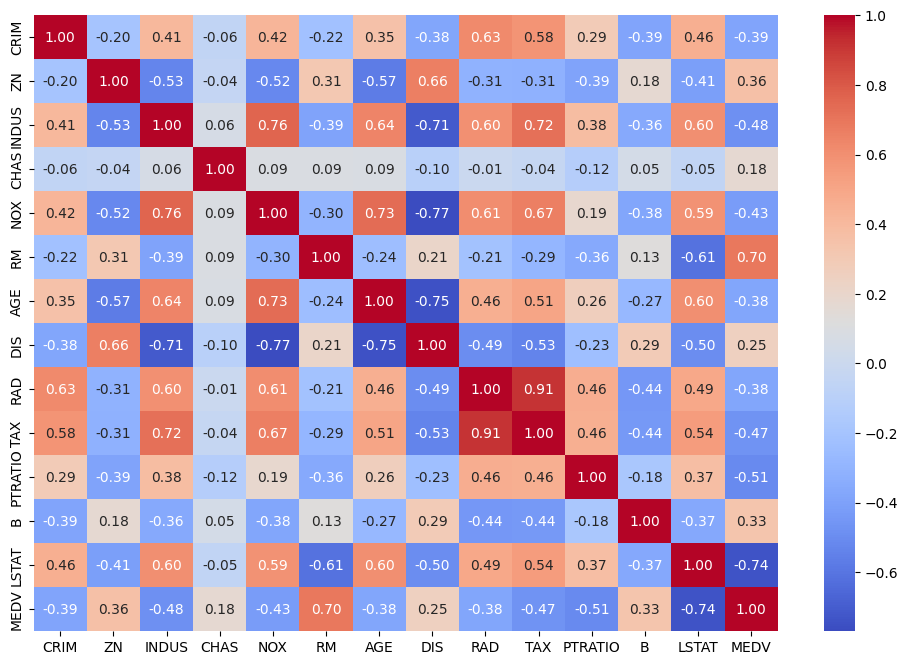

In [24]:
# Correlation Heatmap (Biểu đồ nhiệt tương quan --> Hiển thị mức độ tương quan giữa các biến)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()